In [32]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

'''
You are asked to filter a noisy but slowly-shifting sensor signal with a low-pass, finite impulse response (FIR) filter.  Derive the mean delay and expected SNR boost (noise standard deviation of output compared to input) for two filter variations:

a)  N filter taps uniformly weighted:  y[n] = (x[n] +...+x[n-N+1])/N

b)  M filter taps harmonically weighted:  z[n] = (M*x[n]+(M-1)*x[n-1] ... +1*x[n-M+1]) / (M*(M+1)/2)

What depths (N and M) for each setup are needed to boost the SNR by a factor of 5?
Which setup a) or b) has the lowest mean delay at the required depth?
Which setup would you recommend gives the best tradeoff between SNR and delay?
It may help to plot your results.
'''

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
# filter
N = 4
M = 7
h1 = np.array([1]*N)/N
h2 = np.array([i for i in range(M,0,-1)])/(M*(M+1)/2)
#print('h1 = %s' % h1)
#print('h2 = %s' % h2)

gd1 = 1.4970703125
gd2 = 0.001953125


/home/longle/env3.5/lib/python3.5/site-packages/scipy/signal/filter_design.py:631: UserWarning: The group delay is singular at frequencies [1.571], setting to 0
  format(", ".join("{0:.3f}".format(ws) for ws in w[singular]))


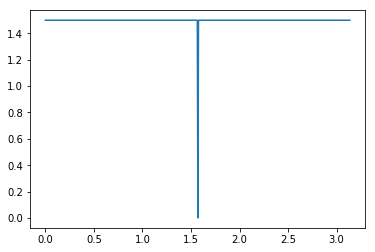

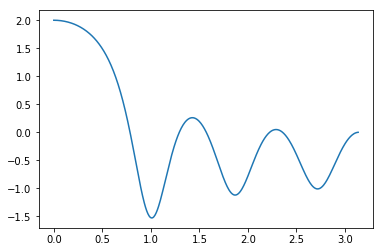

In [63]:
# group delay
w1,gd1 = signal.group_delay((h1,1))
w2,gd2 = signal.group_delay((h2,1))

plt.figure()
plt.plot(w1,gd1)
plt.figure()
plt.plot(w2,gd2)

print('gd1 = %s' % np.mean(gd1))
print('gd2 = %s' % np.mean(gd2))

Text(0.5,1,'snrBoost2 = 5.13361455089')

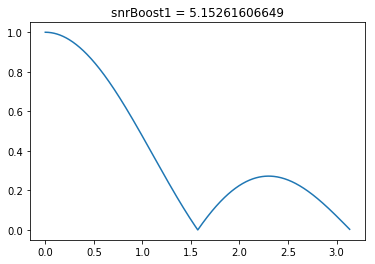

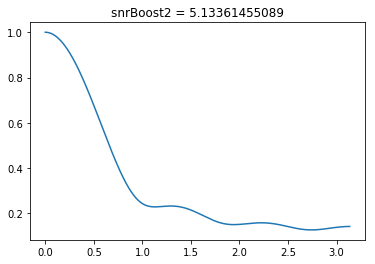

In [64]:
# SNR boost and frequency response
w1,H1 = signal.freqz(h1)
w2,H2 = signal.freqz(h2)

# out = A*in, thus std(out) = A*std(in)
snrBoost1 = 1/np.mean([abs(nH1) for nH1 in H1 if abs(nH1) < 0.5])
snrBoost2 = 1/np.mean([abs(nH2) for nH2 in H2 if abs(nH2) < 0.5])

plt.figure()
plt.plot(w1,abs(H1))
plt.title('snrBoost1 = %s' % snrBoost1)

plt.figure()
plt.plot(w2,abs(H2))
plt.title('snrBoost2 = %s' % snrBoost2)